### Python based viewer tool for "Probabilistic Reasoning over time", EDAP01 Artificial Intelligence
This notebook has been provided to you by Alexander Dürr, teaching assistant on the course, spring term 2021. It is based on the ideas and structure of the original Java skeleton for this assignment, provided by Elin A. Topp. Contact us (elin_anna.topp at cs.lth.se) in case you need help!

### Note: Installing and activating widgets for Jupyter Notebook
To be able to display the visualization (dashboard,animations,etc.) you have to initially install the package  if you don't have it yet

### Note: Use Jupyter Lab for programming, Jupyter Notebook for visualization (optional)
This command only enables the extension for jupyter notebook and not in jupyter lab! You can edit from the comfort of jupyter lab though and when you feel like using the widgets just go to

Menu bar > Help > Launch Classic Notebook

## Here we go... inspecting the models, option 1

### Your main job will be in the file Filters.py and in the last cell of this notebook, this is only to understand the models

In _models_, all the actually interesting stuff is located, and in _Filters_ you should write your own code. Note that the visualization (next cell on inspecting the models, option 2) assumes to have access to an object of type _Localizer_ which in turn expects the filtering / smoothing to happen in _Filters.HMM_Filters.filter(sensorR)_. This means that IF you want to make use of the visualisation in grid-view (below!) also for the actual tracking, you MUST implement the filtering in _Filters.HMM_Filter.filter(sensorR)_ (or make changes in _Localizer.Localizer.update()_)



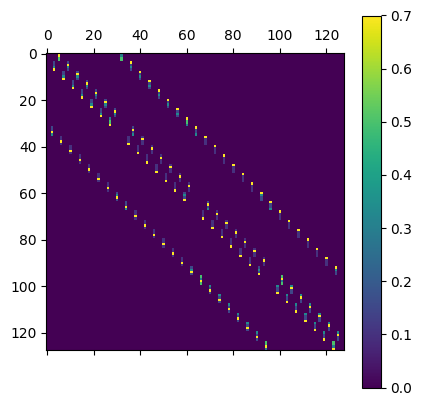

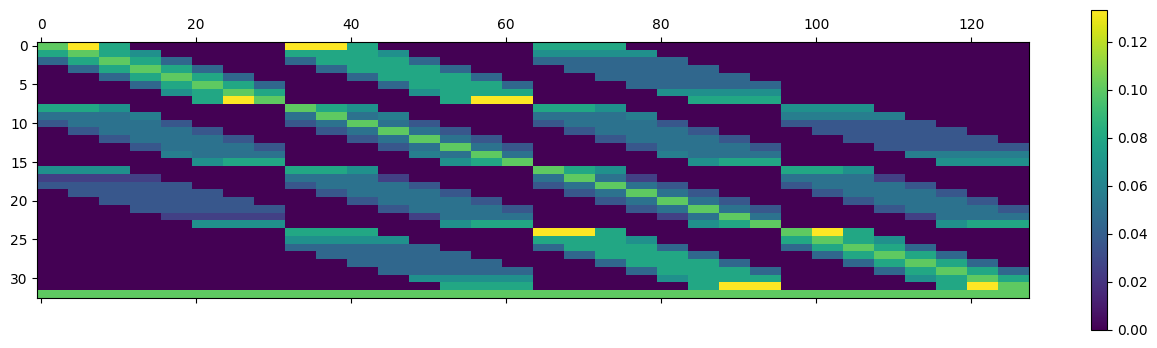

[[0.1 0.  0.  ... 0.  0.  0. ]
 [0.  0.1 0.  ... 0.  0.  0. ]
 [0.  0.  0.1 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]
[[0.1 0.  0.  ... 0.  0.  0. ]
 [0.  0.1 0.  ... 0.  0.  0. ]
 [0.  0.  0.1 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.1 0.  0. ]
 [0.  0.  0.  ... 0.  0.1 0. ]
 [0.  0.  0.  ... 0.  0.  0.1]]
(True, 0, 6, 3, 0, 5, 0, 0, 6, array([0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125,
       0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125,
       0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125,
       0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125,
       0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125,
       0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125,
       0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125,
       0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125,
       0.03125, 0.03125, 

In [6]:
from models import *
from view_control.Localizer import Localizer

# Testing the models, e.g., for an 4x8 grid

states = StateModel( 4, 8)
loc = Localizer( states, 1)
tMat = loc.get_transition_model()
sVecs = loc.get_observation_model()
tMat.plot_T()
sVecs.plot_o_diags()
print(sVecs.get_o_reading(0))
print(sVecs.get_o_reading(None))

print(loc.update())


## Here we go again... inspecting the models, option 2

### Your implementation job will still be in the file Filters.py, this is only to understand the models AND to get a glimpse of a tracking run (but it is slow)

In _models_, all the actually interesting stuff is located, and in _Filters_ you should write your own code. Note that this visualization assumes to have access to an object of type Localizer which in turn expects the filtering / smoothing to happen in _Filters.HMM_Filters.filter()_. This means that IF you want to make use of the visualisation in grid-view also for the actual tracking, you MUST implement the filtering in Filters.HMM_Filter.filter() (or make respective changes in _Localizer.Localizer.update()_)

### Your Task 1)
#### Inspect the visualisation of the models by running the cell and experimenting with the GUI, in particular compare and explain the different versions of the sensor model (see more detailed instructions for the task and report)

In [2]:
# In view_control.Dashboard, there is simply the handling of all the thread based visualisation provided, 
# no changes needed, but feel free...

from view_control import *

ROWS = 4
COLS = 4

# The dashboard creates a state model of the dimensions given by ROWS and COLS, sets up the respective 
# Transition and Observation models, as well as an instance of class Localizer. The Localizer calls at the 
# moment a stubb method toDo.Filters.HMMFilter.filter(sensorReading), which just sends back the original 
# probability distribution - no filtering is done. It is your task to implement something useful there.

# Non-uniform failure is the default sensor, sensor 0. Change to 1 if that is your default 
# (uniform sensor failure)
sensorType = 0
dash = Dashboard(ROWS, COLS, sensorType)
display(dash.db)


12 12 [ 0  3  6  9 12]


12 12 [ 0  3  6  9 12]


true pose = <1, 1, 3>, sensed position = <2, 1>, guessed position = <2, 1>
nbr of moves: 1, avg error: 1.0, nbr correct guesses: 0
12 12 [ 0  3  6  9 12]


12 12 [ 0  3  6  9 12]


true pose = <1, 0, 3>, sensed position = <1, 1>, guessed position = <1, 1>
nbr of moves: 2, avg error: 1.0, nbr correct guesses: 0
12 12 [ 0  3  6  9 12]


true pose = <0, 0, 2>, sensed nothing
nbr of moves: 3, avg error: 1.0, nbr correct guesses: 0


## Write your own "main" here (without the viewer)

### Your task 2)
#### Implement both Forward Filtering and Forward-Backward Smoothing with k = t-5 (a sequence length of 5)
#### Do evaluations (500 steps should be enough also for the bigger grids) according to the following, adapt the number of steps or the size of the grid if needed, but comment on it
#### Provide plots of the Manhattan distance over time

1)
* Forward Filtering with non-uniform sensor failure on 8x8 grid against
* Sensor output only (non-uniform sensor failure, count sensor failures to get the average frequency, but do not count those steps into the avg Manhattan distance) on 8x8 grid 


2)
* Forward Filtering with non-uniform sensor failure on 4x4 grid against
* Forward Filtering with uniform sensor failure on 4x4 grid


3)
* Forward Filtering with non-uniform sensor failure on 16x20 grid against
* Forward Filtering with uniform sensor failure on 16x20 grid


4)
* Forward Filtering with non-uniform sensor failure on 10x10 grid against
* Smoothing (forward-backward smoothing) with k = t-5 (five steps for b) and non-uniform sensor failure on 10x10 grid

#### OBS: obviously, each pair-wise evaluation should be run based on the same true trajectory (cases 1, 2, 3) or same trajectory AND same sensor reading sequence (for case 4).

In [ ]:
# In this cell, you can write your own "main" to run and evaluate your 
# implementation without using the visualisation above (should be considerably faster!)

from models import *
from Filters import HMMFilter

import numpy as np
import matplotlib.pyplot as plt
import random

#main code in this cell was made from inspiration of the localizer class
#as well as help from fellow classmates Nils Randevik and David Petersson

#Shift case depending on which configuration is being tested
CASE = 1

STEPS = 500

#Support method to make it easier grabbing essential values, moste of the code used from the localizer.py update method
#With help from David Petersson on which parts were needed
def locCalcs (trueState, sensor, nbrStates, probs, sm, case1, corGuess, totError):
    fPositions = probs.copy()

    for state in range(0, nbrStates, 4):
        fPositions[state:state+4] = sum(fPositions[state:state+4])

    estimate = sm.state_to_position((np.argmax(fPositions)))

    tsX, tsY, tsH = sm.state_to_pose(trueState)
    eX, eY = estimate

    if case1 and sensor == None:
        error = -1
    else:
        error = abs(tsX-eX)+abs(tsY-eY)
        totError += error
    
    if eX == tsX and eY == tsY:
        corGuess += 1

    return error, totError, corGuess


def main():

    #case configurations depending on whats being tested
    if CASE == 1:
        sm = StateModel(8, 8)
        tm = TransitionModel(sm)
        nbrStates = sm.get_num_of_states()
        probs1 = np.ones(nbrStates) / nbrStates
        probs2 = np.ones(nbrStates) / nbrStates
        sm.state_to_position(np.argmax(probs1))
        obserM1 = ObservationModel_NUF.ObservationModel(sm)
        obserM2 = ObservationModel_NUF.ObservationModel(sm)
        HMM1 = HMMFilter(probs1, tm, obserM1, sm)

    elif CASE == 2 or CASE == 3:
        if(CASE == 2):
            sm = StateModel(4, 4)
        else: 
            sm = StateModel(16, 20)
        tm = TransitionModel(sm)
        nbrStates = sm.get_num_of_states()
        probs1 = np.ones(nbrStates) / nbrStates
        probs2 = np.ones(nbrStates) / nbrStates
        sm.state_to_position(np.argmax(probs1))
        obserM1 = ObservationModel_NUF.ObservationModel(sm)
        obserM2 = ObservationModel_UF.ObservationModelUF(sm)
        HMM1 = HMMFilter(probs1, tm, obserM1, sm)
        HMM2 = HMMFilter(probs2, tm, obserM2, sm)

    elif CASE == 4:
        sm = StateModel(10, 10)
        tm = TransitionModel(sm)
        nbrStates = sm.get_num_of_states()
        probs1 = np.ones(nbrStates) / nbrStates
        probs2 = np.ones(nbrStates) / nbrStates
        sm.state_to_position(np.argmax(probs1))
        obserM1 = ObservationModel_NUF.ObservationModel(sm)
        obserM2 = ObservationModel_NUF.ObservationModel(sm)
        HMM1 = HMMFilter(probs1, tm, obserM1, sm)
        HMM2 = HMMFilter(probs2, tm, obserM2, sm)
        prevSteps = []
        trueState = random.randint(0, nbrStates-1)
        rs = RobotSim(trueState, sm)
        sensor0 = None
        for i in range(5): 
            trueState = rs.move_once(tm)
            sense = rs.sense_in_current_state(obserM1)
            prevSteps.append([trueState, sensor0])

    #starting values and initating variables to be worked with before loop
    trueState = random.randint(0, nbrStates-1)
    robS = RobotSim(trueState, sm)
    corGuessMod1 = 0
    corGuessMod2 = 0
    totError1 = 0
    totError2 = 0
    sums1 = []
    sums2 = []
    
    #approach used here was a combination of inspiration from update in localizer.py 
    #as well as the iterativ description in the handout
    for i in range(1, STEPS+1):
        case1 = False
        trueState = robS.move_once(tm)
        sensor1 = robS.sense_in_current_state(obserM1)
        sensor2 = robS.sense_in_current_state(obserM2)

        if CASE == 1:
            probs1 = HMM1.filter(sensor1)
            probs2 = np.diag(obserM2.get_o_reading(sensor2))
            case1 = True
        elif CASE == 2 or CASE == 3:
            probs1 = HMM1.filter(sensor1)
            probs2 = HMM2.filter(sensor2)
        elif CASE == 4:
            prevSteps.append([trueState, sensor1])
            trueState, sensor1 = prevSteps[0]
            prevSteps = prevSteps[1:]                   #slice away first value
            probs1 = HMM1.filter(sensor1)
            probs2 = HMM2.smoothing(sensor1, prevSteps)

            error1, totError1, corGuessMod1 = locCalcs(trueState, sensor1, nbrStates, probs1, sm, case1, corGuessMod1, totError1)
            error2, totError2, corGuessMod2 = locCalcs(trueState, sensor2, nbrStates, probs2, sm, case1, corGuessMod2, totError2)


        sums1.append(error1)
        sums2.append(error2)
        #sums1.append(totError1/i)
        #sums2.append(totError2/i)

    #Results
    #I really struggled with some of the math behind what values we actually were looking for
    #Since im studying bachelor degree in computer science i have not antended flerdimensionell analys
    #Here i got great help from previously mentioned fellow classmate Nils with understanding what values are actually important
    #as well as where to get them
    print("Case: ", CASE)
    print("First model: ", " Number of correct guesses: ", corGuessMod1, "|| Average numbers of errors: ", totError1/STEPS)
    temp1 = []
    for i in range(1, STEPS+1):
        temp1.append(i)
    plt.figure()
    plt.plot(temp1, sums1)

    print("Second model: ", " Number of correct guesses: ", corGuessMod2, "|| Average numbers of errors: ", totError2/STEPS)
    temp2 = []
    for i in range(1, STEPS+1):
        temp2.append(i)
    plt.figure()
    plt.plot(temp2, sums2)

    return
main()
    